# Handin 3
   ### Andreas Malthe Henriksen ( 202004107 )

You've built a drone, but it has a problem overheating. Temperature measurements were taken.

<table>
    <tr>
        <td>Time (minutes)</td>
        <td>2</td>
        <td>5</td>
        <td>8</td>
        <td>10</td>
        <td>11</td>
    </tr>
    <tr>
        <td>Temperature (celcius)</td>
        <td>35</td>
        <td>40</td>
        <td>50</td>
        <td>65</td>
        <td>70</td>
    </tr>
</table>

#### (a) Plot the observed data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
time = np.array([2,5,8,10,11])
temp = np.array([35,40,50,65,70])

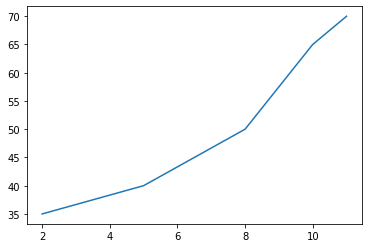

In [14]:
fig, ax = plt.subplots()

ax.plot(time,temp)